# Time Series EDA

![](https://miro.medium.com/max/720/0*vcevXt1yi6wu92aj.webp)

### Task we perform:
1. Pandas Data Reader ----> Financial Data
2. Date Time Index
3. Time Resampling
4. Time Shifts
5. Mean Rolling and Expanding
6. Time Series Visualization
7. One Sample Project on Time Series

### Table Of Contents:
- [Lineplot Date vs High](#Lineplot-Date-vs-High)
- [Remove index of dataframe using `set_index`](#Remove-index-of-dataframe-using-`set_index`)
- [Data between dates `2020-01-01` and `2021-09-01`](#Data-between-dates-`2020-01-01`-and-`2021-09-01`)
- [Datetime Index](#Datetime-Index)
- [Change Datetime dtype from object to datetime](#Change-Datetime-dtype-from-object-to-datetime)
- [Datetime](#Datetime)
- [Check how much time a function takes to execute](#Check-how-much-time-a-function-takes-to-execute)
- [Time Sampling](#Time-Sampling)
- [Good artical on Datetime Sampling](#Good-artical-on-Datetime-Sampling)
- [Year end Frequency (pd.resample)](#Year-end-Frequency-(pd.resample))
- [Rolling in Timeseries](#Rolling-in-Timeseries)

### Install the necessary libraries

In [1]:
# !pip install pmdarima -q

In [2]:
# !pip install yfinance -q

In [45]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
tsla = yf.Ticker('gold')

#get historical data as hist
hist = tsla.history(period = "5y")

# save dataframe as csv file
hist.to_csv('gold.csv')

In [34]:
df_tesla = pd.read_csv("TSLA.csv")
df_tesla.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-22,23.293333,23.855333,23.280001,23.437332,93156000,0,0
1,2018-01-23,24.000000,24.033333,23.400000,23.519333,81981000,0,0
2,2018-01-24,23.638666,23.650000,22.901333,23.059334,79312500,0,0
3,2018-01-25,23.218000,23.280001,22.426666,22.509333,101104500,0,0
4,2018-01-26,22.766666,22.933332,22.380667,22.856667,68091000,0,0


In [4]:
df_tesla.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1254,2023-01-13,116.550003,122.629997,115.599998,122.400002,180439300,0,0
1255,2023-01-17,125.699997,131.699997,125.019997,131.490005,186477000,0,0
1256,2023-01-18,136.559998,136.679993,127.010002,128.779999,195680300,0,0
1257,2023-01-19,127.260002,129.990005,124.309998,127.169998,170291900,0,0
1258,2023-01-20,128.679993,133.509995,127.349998,133.419998,138429900,0,0


[krish video](https://youtu.be/W-YCKMNTcqE?t=3534) -- [ineuron](https://github.com/sunnysavita10/time-series/blob/main/Time%20Series%20Forecasting%20-%20ARIMA%2C%20SARIMA%20and%20Auto-ARIMA.ipynb)

In [5]:
df_tesla['Date'] = pd.to_datetime(df_tesla['Date'])

### Lineplot Date vs High 

<AxesSubplot:xlabel='Date', ylabel='High'>

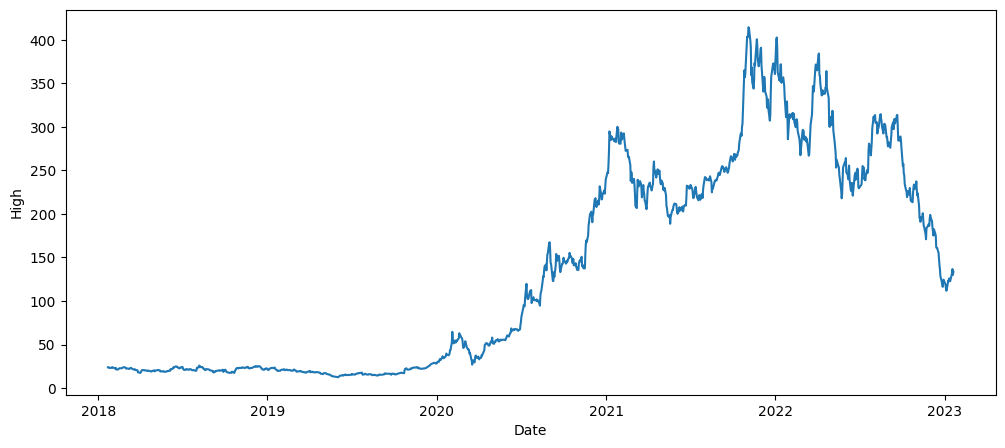

In [6]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df_tesla, x= 'Date',y = 'High')

### Limit date from 2020-01-01 to 2021-09-01 and plot

(0.0, 350.0)

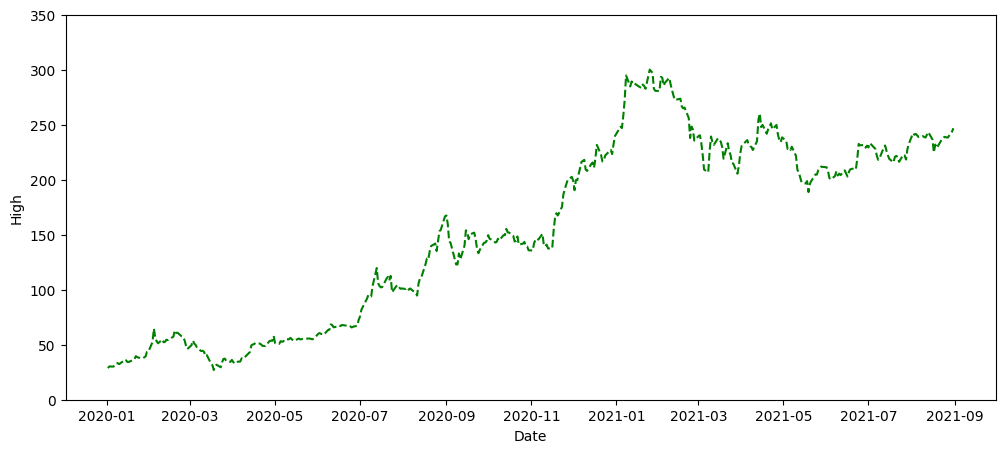

In [7]:
start = '2020-01-01'
end = '2021-09-01'
mask = df_tesla[(df_tesla['Date'] > start) & (df_tesla['Date'] < end)]

plt.figure(figsize=(12,5))
sns.lineplot(data = mask, x = 'Date',y = 'High',ls = '--', c = 'green')
plt.ylim(0,350)

### Remove index of dataframe using `set_index`

In [118]:
df_tesla = df_tesla.set_index('Date',drop=True)

In [119]:
df_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-22,23.293333,23.855333,23.280001,23.437332,93156000,0,0
2018-01-23,24.000000,24.033333,23.400000,23.519333,81981000,0,0
2018-01-24,23.638666,23.650000,22.901333,23.059334,79312500,0,0
2018-01-25,23.218000,23.280001,22.426666,22.509333,101104500,0,0
2018-01-26,22.766666,22.933332,22.380667,22.856667,68091000,0,0
...,...,...,...,...,...,...,...
2023-01-13,116.550003,122.629997,115.599998,122.400002,180439300,0,0
2023-01-17,125.699997,131.699997,125.019997,131.490005,186477000,0,0
2023-01-18,136.559998,136.679993,127.010002,128.779999,195680300,0,0


### Data between dates `2020-01-01` and `2021-09-01`

In [98]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open= df_tesla.loc['2020-01-01':'2021-09-01']['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103332
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

<AxesSubplot:xlabel='Date'>

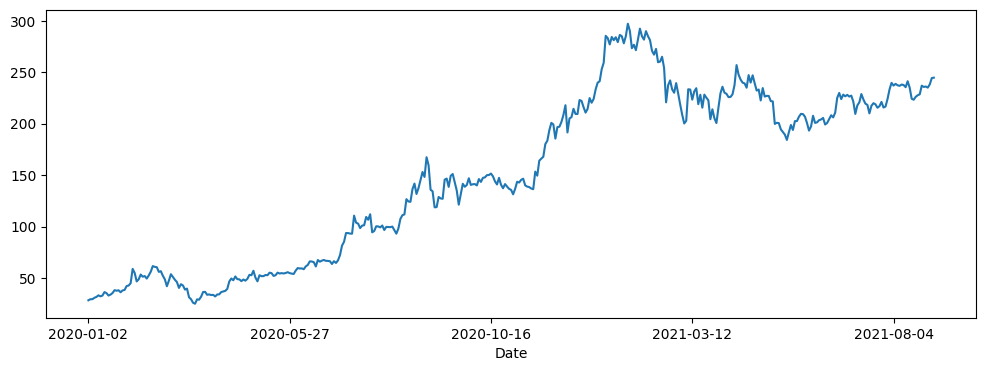

In [99]:
plt.figure(figsize = (12,4))
share_open.plot()

### Datetime Index

In [120]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2018-01-22 to 2023-01-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Volume        1259 non-null   int64  
 5   Dividends     1259 non-null   int64  
 6   Stock Splits  1259 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 78.7+ KB


In [122]:
df_tesla = df_tesla.reset_index()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1259 non-null   object 
 1   Open          1259 non-null   float64
 2   High          1259 non-null   float64
 3   Low           1259 non-null   float64
 4   Close         1259 non-null   float64
 5   Volume        1259 non-null   int64  
 6   Dividends     1259 non-null   int64  
 7   Stock Splits  1259 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 78.8+ KB


### Change Datetime dtype from object to datetime

In [124]:
df_tesla['Date'] = pd.to_datetime(df_tesla['Date'])
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1259 non-null   datetime64[ns]
 1   Open          1259 non-null   float64       
 2   High          1259 non-null   float64       
 3   Low           1259 non-null   float64       
 4   Close         1259 non-null   float64       
 5   Volume        1259 non-null   int64         
 6   Dividends     1259 non-null   int64         
 7   Stock Splits  1259 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 78.8 KB


### Datetime

In [125]:
from datetime import datetime

### Real time Date time of the system

In [129]:
datetime.now()

datetime.datetime(2023, 1, 26, 16, 21, 40, 189241)

In [132]:
def add_num(num1,num2):
    return num1+num2

### Check how much time a function takes to execute

In [133]:
start_time = datetime.now()
num1 = 20
num2 = 30

add_num(num1,num2)
end_time = datetime.now()
print(end_time - start_time)

0:00:00


In [134]:
date = datetime(2021,11,21)
date

datetime.datetime(2021, 11, 21, 0, 0)

In [136]:
date.date()

datetime.date(2021, 11, 21)

In [145]:
print("day:",date.day)
print("month:",date.month)
print("year",date.year)
print("weekday:",date.weekday())
print("hour",date.hour)

day: 21
month: 11
year 2021
weekday: 6
hour 0


## Time Sampling

In [152]:
df_tesla = df_tesla.set_index('Date')
df_tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-22,23.293333,23.855333,23.280001,23.437332,93156000,0,0
2018-01-23,24.000000,24.033333,23.400000,23.519333,81981000,0,0
2018-01-24,23.638666,23.650000,22.901333,23.059334,79312500,0,0
2018-01-25,23.218000,23.280001,22.426666,22.509333,101104500,0,0
2018-01-26,22.766666,22.933332,22.380667,22.856667,68091000,0,0


### Good artical on Datetime Sampling 
https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

### Year end Frequency (pd.resample)

In [157]:
# shows minimum share price every year
df_tesla.resample(rule= "A").min()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31,16.851999,17.355333,16.306000,16.704000,46210500,0,0
2019-12-31,12.073333,12.445333,11.799333,11.931333,36984000,0,0
2020-12-31,24.980000,26.990667,23.367332,24.081333,52073100,0,0
2021-12-31,184.183334,188.736664,179.830002,187.666672,29401800,0,0
2022-12-31,110.349998,116.269997,108.239998,109.099998,41864700,0,0
2023-12-31,103.000000,111.750000,101.809998,108.099998,138429900,0,0


In [158]:
# shows maximum share price every year
df_tesla.resample(rule= "A").max()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31,25.000000,25.830668,24.474667,25.304667,504745500,0,0
2019-12-31,29.000000,29.020666,28.423332,28.729334,450091500,0,0
2020-12-31,233.330002,239.573334,230.373337,235.223328,914082000,0,5
2021-12-31,411.470001,414.496674,405.666656,409.970001,268189500,0,0
2022-12-31,396.516663,402.666656,378.679993,399.926666,221923300,0,3
2023-12-31,136.559998,136.679993,127.349998,133.419998,231402800,0,0


### Quarterly start frequency

In [163]:
df_tesla.resample(rule = 'QS').max()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-01,24.000000,24.033333,23.490667,23.827999,315021000,0,0
2018-04-01,24.344000,24.915333,23.633333,24.722000,335211000,0,0
2018-07-01,24.606001,25.830668,24.474667,25.304667,504745500,0,0
2018-10-01,25.000000,25.299334,24.450001,25.119333,411382500,0,0
2019-01-01,23.080668,23.466667,22.943333,23.153999,362262000,0,0
2019-04-01,19.219999,19.744667,19.144667,19.454000,398206500,0,0
2019-07-01,17.278000,17.738001,17.210667,17.658667,336274500,0,0
2019-10-01,29.000000,29.020666,28.423332,28.729334,450091500,0,0
2020-01-01,61.566666,64.599335,60.068001,61.161331,914082000,0,0


### Business Year End Frequency

In [164]:
df_tesla.resample(rule = 'BA').max()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31,25.000000,25.830668,24.474667,25.304667,504745500,0,0
2019-12-31,29.000000,29.020666,28.423332,28.729334,450091500,0,0
2020-12-31,233.330002,239.573334,230.373337,235.223328,914082000,0,5
2021-12-31,411.470001,414.496674,405.666656,409.970001,268189500,0,0
2022-12-30,396.516663,402.666656,378.679993,399.926666,221923300,0,3
2023-12-29,136.559998,136.679993,127.349998,133.419998,231402800,0,0


### Business Quarters

In [165]:
df_tesla.resample(rule = 'BQS').max()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-01,24.000000,24.033333,23.490667,23.827999,315021000,0,0
2018-04-02,24.344000,24.915333,23.633333,24.722000,335211000,0,0
2018-07-02,24.606001,25.830668,24.474667,25.304667,504745500,0,0
2018-10-01,25.000000,25.299334,24.450001,25.119333,411382500,0,0
2019-01-01,23.080668,23.466667,22.943333,23.153999,362262000,0,0
2019-04-01,19.219999,19.744667,19.144667,19.454000,398206500,0,0
2019-07-01,17.278000,17.738001,17.210667,17.658667,336274500,0,0
2019-10-01,29.000000,29.020666,28.423332,28.729334,450091500,0,0
2020-01-01,61.566666,64.599335,60.068001,61.161331,914082000,0,0


In [166]:
df_tesla.resample(rule = 'BA').mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31,21.099342,21.531938,20.645289,21.096619,1.311737e+08,0.0,0.000000
2019-12-31,18.201876,18.509987,17.907503,18.235347,1.373838e+08,0.0,0.000000
2020-12-31,96.369476,99.096137,93.565979,96.665689,2.259239e+08,0.0,0.019763
2021-12-31,259.946429,265.243941,254.236045,259.998162,8.217489e+07,0.0,0.000000
2022-12-30,264.135232,270.567716,256.507357,263.093081,8.693445e+07,0.0,0.011952
2023-12-29,120.039999,123.876921,116.150769,121.061538,1.825239e+08,0.0,0.000000


### Monthly Frequency

In [168]:
df_tesla.resample(rule = 'M').max()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-31,24.000000,24.033333,23.400000,23.620666,101104500,0,0
2018-02-28,23.750000,23.999332,23.490667,23.827999,194005500,0,0
2018-03-31,23.000668,23.244667,22.004667,23.034000,315021000,0,0
2018-04-30,20.240000,20.633333,19.977333,20.381332,298450500,0,0
2018-05-31,20.513332,20.865999,20.274000,20.456667,260281500,0,0
...,...,...,...,...,...,...,...
2022-09-30,308.290008,313.799988,305.579987,309.070007,87087800,0,0
2022-10-31,254.500000,257.500000,242.009995,249.440002,117798100,0,0
2022-11-30,234.050003,237.399994,227.279999,227.820007,132703000,0,0


<AxesSubplot:ylabel='Date'>

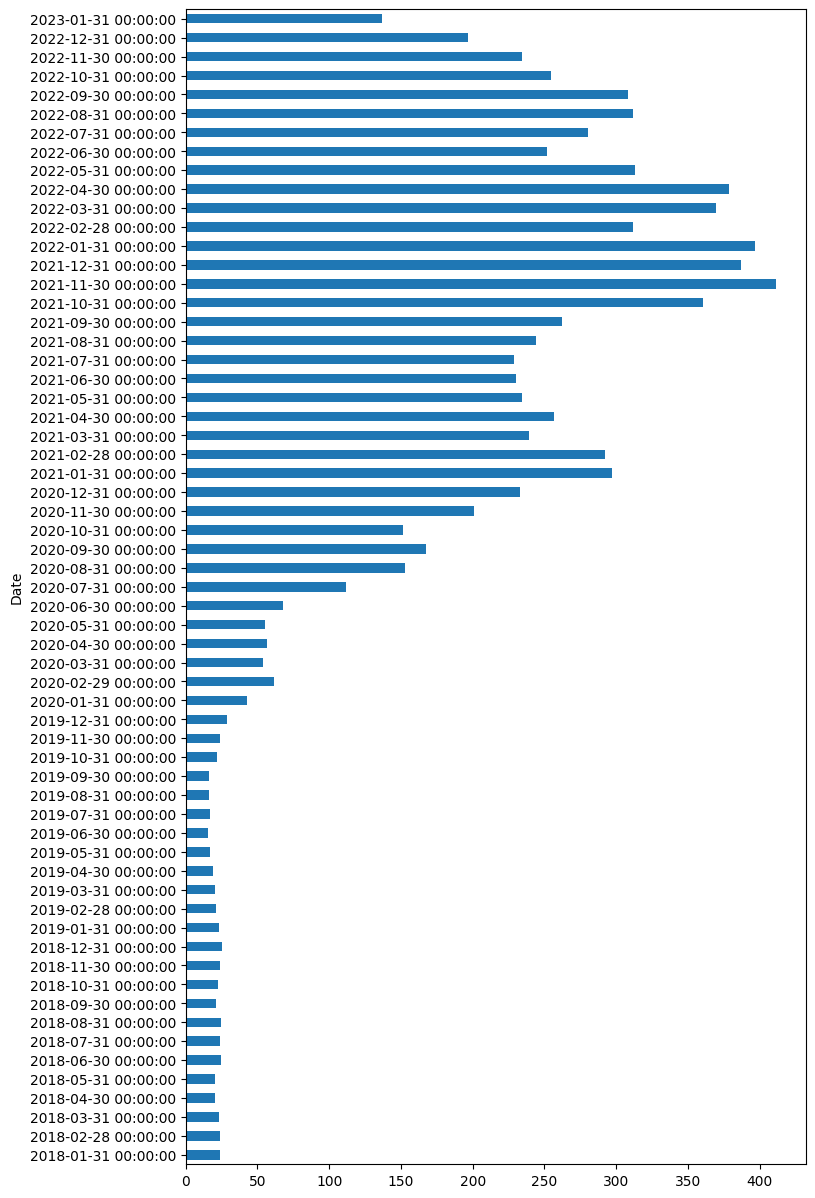

In [174]:
## Graph show at what value share opens every month within the 5year time interval
df_tesla['Open'].resample(rule = 'M').max().plot(kind = 'barh', figsize=(8,15))

### Rolling in Timeseries
Provide rolling window calculations.

In [176]:
df_tesla['High'].rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [195]:
df_tesla['High'].rolling(10).mean().head(20)

Date
2018-01-22          NaN
2018-01-23          NaN
2018-01-24          NaN
2018-01-25          NaN
2018-01-26          NaN
2018-01-29          NaN
2018-01-30          NaN
2018-01-31          NaN
2018-02-01          NaN
2018-02-02    23.554667
2018-02-05    23.465600
2018-02-06    23.303733
2018-02-07    23.245400
2018-02-08    23.241533
2018-02-09    23.088067
2018-02-12    22.869600
2018-02-13    22.709067
2018-02-14    22.508933
2018-02-15    22.338667
2018-02-16    22.279800
Name: High, dtype: float64

In [196]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(30).mean()

In [197]:
df_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open:30 days rolling
Date,,,,,,,,
2018-01-22,23.293333,23.855333,23.280001,23.437332,93156000,0,0,NaN
2018-01-23,24.000000,24.033333,23.400000,23.519333,81981000,0,0,NaN
2018-01-24,23.638666,23.650000,22.901333,23.059334,79312500,0,0,NaN
2018-01-25,23.218000,23.280001,22.426666,22.509333,101104500,0,0,NaN
2018-01-26,22.766666,22.933332,22.380667,22.856667,68091000,0,0,NaN
...,...,...,...,...,...,...,...,...
2023-01-13,116.550003,122.629997,115.599998,122.400002,180439300,0,0,143.872000
2023-01-17,125.699997,131.699997,125.019997,131.490005,186477000,0,0,141.492666
2023-01-18,136.559998,136.679993,127.010002,128.779999,195680300,0,0,139.652000


<AxesSubplot:xlabel='Date'>

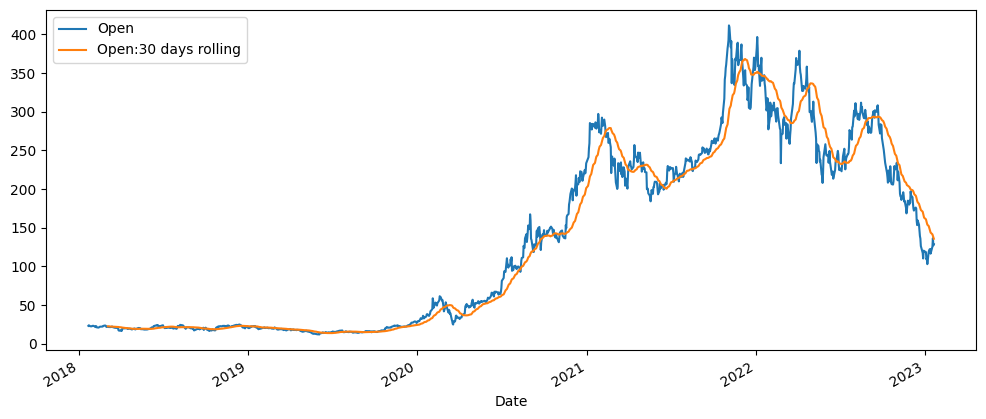

In [199]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))